In [56]:

import numpy as np, healpy as hp
from enlib import enmap, utils, curvedsky, coordinates, memory

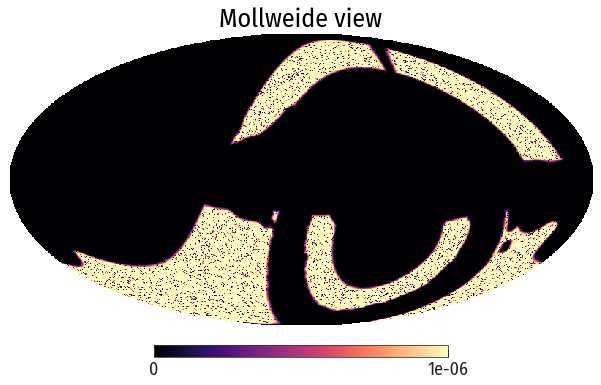

In [83]:
m090 = hp.read_map("window_dr6_pa6_f090.fits")
hp.mollview(m)

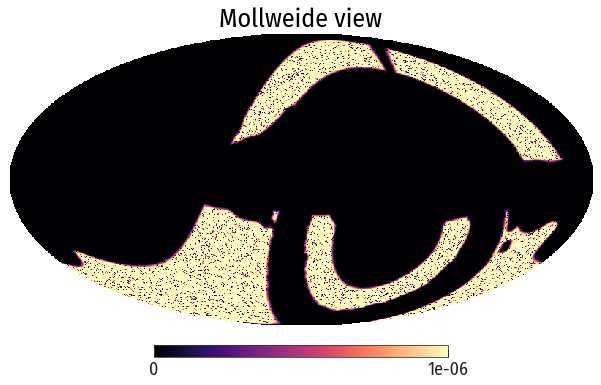

In [88]:
m150 = hp.read_map("window_dr6_pa4_f150.fits")
hp.mollview(m)

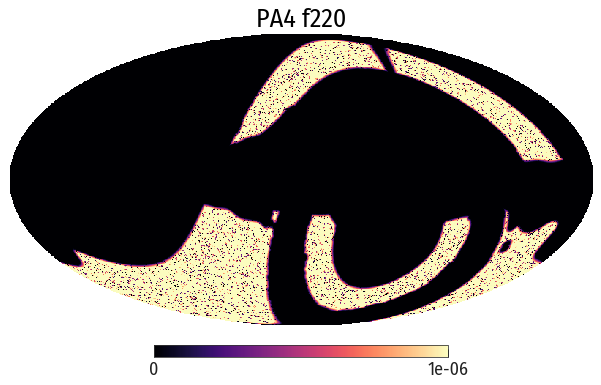

In [89]:
m220 = hp.read_map("window_dr6_pa4_f220.fits")
hp.mollview(m, title="PA4 f220")

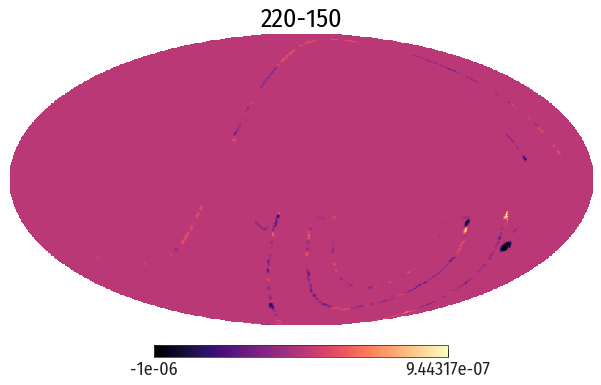

In [90]:
# m220 = hp.read_map("window_dr6_pa4_f220.fits")
hp.mollview(m220 - m150, title="220-150")

In [69]:
f = "/global/cscratch1/sd/xzackli/PSpipe/project/data_analysis/windows/window_dr6_pa6_f090.fits"
m_e = enmap.read_map(f)

In [70]:
m_e_unrot = m_e.to_healpix(2048)

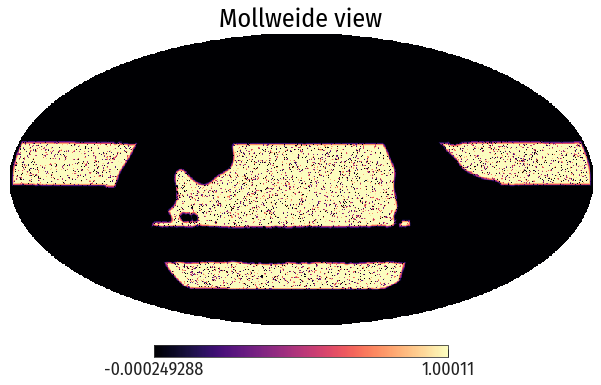

In [71]:
hp.mollview(m_e_unrot)

In [13]:
f = "/project/projectdirs/act/data/tlouis/s17s18s19/masks/mask_galactic_equatorial_car_halfarcmin_pixelmatch.fits"
shape, wcs = enmap.read_map_geometry(f)
shape = shape[-2:]

In [14]:
dtype = np.float32
dec, ra = enmap.posaxes(shape, wcs)
pix  = np.zeros(shape, np.int32)
psi  = np.zeros(shape, dtype)
nblock = (shape[-2]+rstep-1)//rstep

In [39]:
bi = 0
i = bi*rstep
rdec = dec[:]
ipos = np.zeros((2,len(rdec),len(ra)))
ipos[0] = rdec[:,None]
ipos[1] = ra  [None,:]
# This is unreasonably slow
opos = coordinates.transform("equ", "gal", ipos[::-1], pol=False)
for i in range(0, shape[-2], rstep):
    pix[i::,:] = healpy.ang2pix(nside, np.pi/2-opos[1], opos[0])
    psi[i::,:] = opos[2]
del ipos, opos

ValueError: could not broadcast input array from shape (10320,43200) into shape (10220,43200)

In [45]:

opos = coordinates.transform("equ", "gal", ipos[::-1], pol=False)
opos.shape

(2, 10320, 43200)

In [20]:
name = f
imap  = enmap.read_map(f)

In [21]:
omap  = np.zeros((1,12*nside**2),dtype)
hits  = np.bincount(pix.reshape(-1), minlength=npix)

In [27]:
for i in (0,):
    rhs = np.bincount(pix.reshape(-1), imap.reshape(-1), minlength=npix)
    rhs[hits>0] /= hits[hits>0]
    omap[i] = rhs

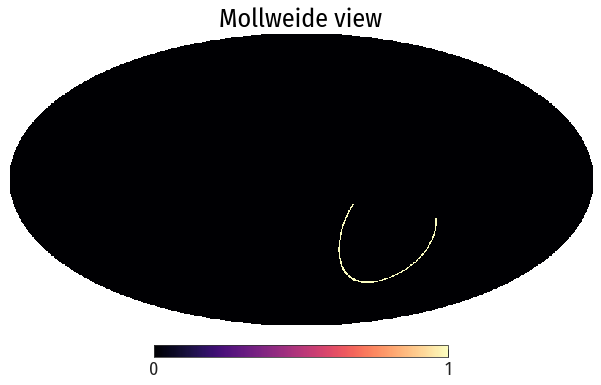

In [33]:
healpy.mollview(omap[0])